**Import Libraries**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

**Read DataSet**

In [18]:
df = pd.read_csv ('K:/Breast_Cancer_Project/data.csv')

**Target Visualization** (diagnosis)

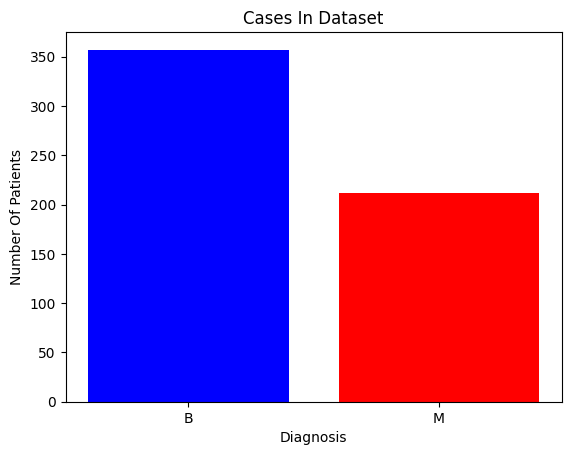

diagnosis
B    357
M    212
Name: count, dtype: int64


In [19]:
counts = df['diagnosis'].value_counts()

plt.bar(counts.index, counts.values, color=['blue', 'red'])
plt.xlabel("Diagnosis")
plt.ylabel("Number Of Patients")
plt.title("Cases In Dataset")
plt.show()

print(counts)

**Clean DataSet**

In [20]:

df = df.drop(columns=["id", "Unnamed: 32"])


**Encode Our Target**

In [21]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])


Split Target and Features

In [22]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


**Train Our Models** (2 Models)

In [23]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [24]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Prediction**

In [25]:
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

**Evaluation**

In [26]:
print(" Logistic Regression ")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))



 Logistic Regression 
Accuracy: 0.958041958041958
Precision: 0.9615384615384616
Recall: 0.9259259259259259


In [27]:
print("\n Random Forest ")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))


 Random Forest 
Accuracy: 0.965034965034965
Precision: 0.9622641509433962
Recall: 0.9444444444444444


In [28]:
print("\n Random Forest Classification Report ")
print(classification_report(y_test, y_pred_rf, target_names=["Benign", "Malignant"]))


 Random Forest Classification Report 
              precision    recall  f1-score   support

      Benign       0.97      0.98      0.97        89
   Malignant       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [29]:

print("\n Logistic Regression Classification Report ")
print(classification_report(y_test, y_pred_log, target_names=["Benign", "Malignant"]))


 Logistic Regression Classification Report 
              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97        89
   Malignant       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



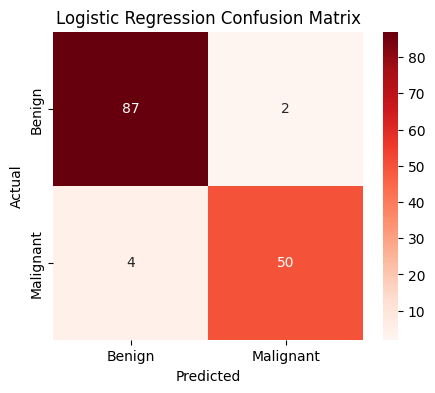

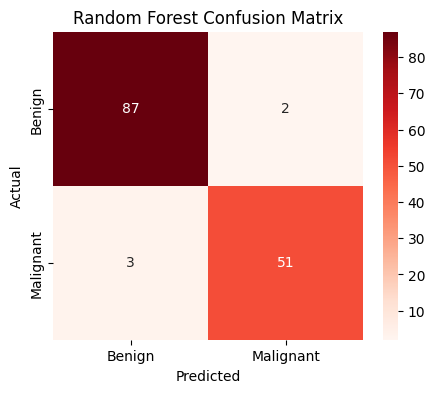

In [30]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
                xticklabels=["Benign", "Malignant"],
                yticklabels=["Benign", "Malignant"])
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


plot_conf_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")


plot_conf_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

In [31]:
import joblib
joblib.dump(rf_clf, "breast_cancer_model.pkl")

['breast_cancer_model.pkl']